# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Para Aplicações de IA com PyTorch e Lightning</font>

## <font color='blue'>Trabalhando com Tensores</font>

> Visite a documentação oficial: https://pytorch.org/docs/stable/index.html

![](imagens/TensoresPyTorch.png)

## Instalando e Carregando os Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
!pip install -q torch==1.13.0

In [4]:
!pip install -q pytorch-lightning==1.8.3

In [5]:
# Imports 
import numpy as np
import torch
import gc
import types
import pkg_resources
import pytorch_lightning as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy            : 1.21.5
torch            : 1.13.0
matplotlib       : 3.5.2
pytorch_lightning: 1.8.3



## Verificando o Ambiente de Desenvolvimento

In [7]:
# Relatório completo

# Verificando o dispositivo
processing_device = "cuda" if torch.cuda.is_available() else "cpu"

# Verificando se GPU pode ser usada (isso depende da plataforma CUDA estar instalada)
torch_aval = torch.cuda.is_available()

# Labels para o relatório de verificação
lable_1 = 'Visão Geral do Ambiente'
lable_2 = 'Se NVIDIA-SMI não for encontrado, então CUDA não está disponível'
lable_3 = 'Fim da Checagem'

# Função para verificar o que está importado nesta sessão
def get_imports():

    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):            
            name = val.__module__.split(".")[0]

        poorly_named_packages = {"PIL": "Pillow", "sklearn": "scikit-learn"}

        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name

# Imports nesta sessão
imports = list(set(get_imports()))

# Loop para verificar os requerimentos
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
        
# Pasta com os dados (quando necessário)
pasta_dados = r'dados'

print(f'{lable_1:-^100}')
print()
print(f"Pasta de Dados: ", pasta_dados)
print(f"Versões dos Pacotes Requeridos: ", requirements)
print(f"Dispositivo Que Será Usado Para Treinar o Modelo: ", processing_device)
print(f"CUDA Está Disponível? ", torch_aval)
print("Versão do PyTorch: ", torch.__version__)
print("Versão do Lightning: ", pl.__version__)
print()
print(f'{lable_2:-^100}\n')
!nvidia-smi
gc.collect()
print()
print(f"Limpando a Memória da GPU (se disponível): ", torch.cuda.empty_cache())
print(f'\n{lable_3:-^100}')

--------------------------------------Visão Geral do Ambiente---------------------------------------

Pasta de Dados:  dados
Versões dos Pacotes Requeridos:  [('matplotlib', '3.5.2'), ('numpy', '1.21.5'), ('torch', '1.13.0')]
Dispositivo Que Será Usado Para Treinar o Modelo:  cpu
CUDA Está Disponível?  False
Versão do PyTorch:  1.13.0
Versão do Lightning:  1.8.3

------------------Se NVIDIA-SMI não for encontrado, então CUDA não está disponível------------------

/bin/bash: nvidia-smi: command not found

Limpando a Memória da GPU (se disponível):  None

------------------------------------------Fim da Checagem-------------------------------------------


## O Que São Tensores?

Em matemática, um tensor é um objeto geométrico arbitrariamente complexo que mapeia de maneira (multi) linear vetores geométricos, escalares e outros tensores para um tensor resultante.

Mas em Deep Learning o conceito é um pouco diferente e você pode pensar no tensor como um recipiente que contém números. Um tensor é uma estrutura de dados que pode ter qualquer número de dimensões.

![](imagens/tensor.png)

## Tensores PyTorch x Arrays NumPy

Você pode criar tensores a partir de listas ou matrizes numpy e vice-versa.

In [8]:
# Cria um tensor 2x3 a partir de uma lista Python
lista_python = [[1, 2, 3], [4, 5, 6]]
t1 = torch.Tensor(lista_python)
print(t1)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [9]:
type(lista_python)

list

In [10]:
type(t1)

torch.Tensor

In [11]:
# Cria um tensor 2x3 a partir de um array Numpy 
array_numpy = np.array([[9, 6, 1], [5, 3, 2]])
t2 = torch.Tensor(array_numpy)
print(t2)

tensor([[9., 6., 1.],
        [5., 3., 2.]])


In [12]:
type(array_numpy)

numpy.ndarray

In [13]:
type(t2)

torch.Tensor

In [14]:
# Convertendo de volta para lista / array
print(f"tensor --> lista python: \n{t1.tolist()}")
print(f"\ntensor --> array numpy: \n{t2.numpy()}")

tensor --> lista python: 
[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

tensor --> array numpy: 
[[9. 6. 1.]
 [5. 3. 2.]]


## Tipos de Tensores no PyTorch

In [15]:
# Cria um tensor 2 x 2 x 3 com valores randômicos
a = torch.rand(2, 2, 3)
print(a)

tensor([[[0.6258, 0.7560, 0.8632],
         [0.9664, 0.2158, 0.0301]],

        [[0.5747, 0.6996, 0.0938],
         [0.0890, 0.2722, 0.6871]]])


In [16]:
# Criando um tensor preenchido com zeros
b = torch.zeros(2, 2, 3)
print(b)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [17]:
# Criando um tensor semelhante a outro
c = torch.zeros_like(a)
print(c)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [18]:
# Criando um tensor de 1's semelhante (like) ao tensor de zeros (mesmas dimensões)
d = torch.ones_like(a)
print(d)

tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])


https://pytorch.org/docs/stable/tensors.html

In [19]:
# Criando um array NumPy
a = np.array([[9, 6, 1], [5, 3, 2]])
a.dtype

dtype('int64')

In [20]:
# Criando tensores de diferentes tipos 
b = torch.Tensor(a)
c = torch.FloatTensor(a)
d = torch.LongTensor(a)
print(f" b: {b.type()}\n c: {c.type()}\n d: {d.type()}")

 b: torch.FloatTensor
 c: torch.FloatTensor
 d: torch.LongTensor


In [21]:
# Criando uma lista Python com valores booleanos
e = [True, False, False, True]
print(type(e))
for item in e: 
    print ('{}  {}'.format(item, type(item)))

<class 'list'>
True  <class 'bool'>
False  <class 'bool'>
False  <class 'bool'>
True  <class 'bool'>


In [22]:
# Criando tensor a partir da lista de booleanos
f = torch.Tensor(e)
print(f)
print(f.type())

tensor([1., 0., 0., 1.])
torch.FloatTensor


In [23]:
# Criando um tensor com valores booleanos
g = torch.zeros(10, dtype = torch.bool)
print(g)
print(g.type())

tensor([False, False, False, False, False, False, False, False, False, False])
torch.BoolTensor


In [24]:
# Alterando o tipo do tensor:
print("Mudando torch.FloatTensor para torch.LongTensor:\n")
print(c.type())
c = c.long()
print(c)
print(c.type())

Mudando torch.FloatTensor para torch.LongTensor:

torch.FloatTensor
tensor([[9, 6, 1],
        [5, 3, 2]])
torch.LongTensor


## Size e Shape de Tensores

In [25]:
# Criando um array NumPy
array_numpy = np.array([[9, 6, 1], [5, 3, 2]])
print(array_numpy)

[[9 6 1]
 [5 3 2]]


In [26]:
array_numpy.shape

(2, 3)

In [27]:
array_numpy.size

6

In [28]:
# Criando um dataframe do Pandas
import pandas
from pandas import DataFrame
df = DataFrame(array_numpy, columns = ['Coluna_A','Coluna_B','Coluna_C'])
print(df)

   Coluna_A  Coluna_B  Coluna_C
0         9         6         1
1         5         3         2


In [29]:
df.shape

(2, 3)

In [30]:
df.size

6

In [31]:
# Cria um tensor com valores randômicos
torch.manual_seed(777)
x = torch.randint(0, 10, size = (2, 3, 4))
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [32]:
# Size - Método do objeto tensor!!!
x.size

<function Tensor.size>

In [33]:
# Size - Método do objeto tensor
x.size()

torch.Size([2, 3, 4])

In [34]:
# Shape - Atributo do objeto tensor
x.shape

torch.Size([2, 3, 4])

In [35]:
# Número total de elementos no Tensor
torch.numel(x)

24

In [36]:
# Alterando o size do tensor (mas sem mudar o tensor original)
print(f"Altera de '{x.size()}' para '{x.view(2, 2, 6).size()}'\n")
print(x.view(2, 2, 6))

Altera de 'torch.Size([2, 3, 4])' para 'torch.Size([2, 2, 6])'

tensor([[[5, 9, 1, 8, 5, 7],
         [7, 7, 3, 4, 1, 7]],

        [[2, 0, 6, 3, 2, 3],
         [0, 0, 9, 5, 4, 2]]])


In [37]:
# Também podemos usao método view() para criar um tensor
t = torch.arange(60).view(3, 4, 5)

In [38]:
print(t)

tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49],
         [50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]])


In [39]:
t.shape == t.size() 

True

In [40]:
t.shape

torch.Size([3, 4, 5])

In [41]:
t.size()

torch.Size([3, 4, 5])

In [42]:
# Número total de elementos no Tensor
torch.numel(t)

60

## Slicing de Tensores Bidimensionais

In [43]:
# Cria um tensor com valores randômicos
torch.manual_seed(222)
x = torch.randint(0, 10, size = (2, 3))

In [44]:
print(x)

tensor([[6, 3, 9],
        [2, 2, 4]])


In [45]:
# Slicing do tensor - Qual valor será retornado?
print(x[1, 2])

tensor(4)


In [46]:
# Slicing do tensor - Qual valor será retornado?
print(x[0, 1])

tensor(3)


## Slicing de Tensores Tridimensionais

In [47]:
# Cria um tensor com valores randômicos
torch.manual_seed(777)
x = torch.randint(0, 10, size = (2, 3, 4))

In [48]:
x.dim()

3

In [49]:
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [50]:
# Slicing do tensor - Qual valor será retornado?
print(x[1, 1, 1])

tensor(3)


In [51]:
# Slicing do tensor - Qual valor será retornado?
print(x[0, 2, 1])

tensor(4)


**Sintaxe:**

tensor[tensor_position_start:tensor_position_end, tensor_dimension_start:tensor_dimension_end , tensor_value_start:tensor_value_end]

**Parâmetros:**

- tensor_position_start
- tensor_position_end
- tensor_dimension_start
- tensor_dimension_stop
- tensor_value_start
- tensor_value_stop

In [52]:
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [53]:
# Slicing do tensor - Quais valores serão retornados?
# Extraímos os 3 primeiros valores da primeira dimensão da primeira posição do tensor
fatia_1 = x[0:1, 0:1, :3]
print(fatia_1)
print('\n')
print(fatia_1.shape)

tensor([[[5, 9, 1]]])


torch.Size([1, 1, 3])


In [54]:
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [55]:
# Slicing do tensor - Quais valores serão retornados?
# Extraímos os valores cujo índice é de 1 a 4 das duas primeiras dimensões da primeira posição do tensor
fatia_2 = x[0:1, 0:2, 1:4]
print(fatia_2)
print('\n')
print(fatia_2.shape)

tensor([[[9, 1, 8],
         [7, 7, 7]]])


torch.Size([1, 2, 3])


In [56]:
print(x)

tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


In [57]:
# Slicing do tensor - Quais valores serão retornados?
# Extraímos os valores cujo índice é de 1 a 3 da terceira dimensão da segunda posição do tensor
fatia_3 = x[1:2, 2:3, 1:3]
print(fatia_3)
print('\n')
print(fatia_3.shape)

tensor([[[5, 4]]])


torch.Size([1, 1, 2])


## Slicing de Tensores 4D

In [58]:
# Cria um tensor com valores randômicos
torch.manual_seed(555)
x = torch.randint(0, 10, size = (2, 3, 4, 7))
print(x)

tensor([[[[6, 0, 3, 5, 8, 3, 4],
          [0, 3, 1, 4, 9, 6, 4],
          [0, 8, 5, 4, 9, 3, 4],
          [0, 0, 8, 1, 7, 0, 0]],

         [[7, 8, 7, 5, 9, 1, 3],
          [5, 8, 7, 6, 5, 5, 2],
          [7, 8, 5, 9, 2, 8, 9],
          [3, 4, 7, 9, 2, 8, 9]],

         [[2, 1, 2, 2, 5, 0, 3],
          [4, 6, 1, 7, 4, 5, 4],
          [4, 9, 0, 4, 2, 9, 0],
          [7, 5, 9, 9, 0, 4, 0]]],


        [[[2, 5, 4, 6, 1, 4, 9],
          [6, 2, 1, 6, 9, 5, 2],
          [0, 7, 0, 7, 2, 9, 3],
          [1, 2, 7, 9, 6, 9, 7]],

         [[4, 4, 0, 8, 1, 5, 7],
          [9, 2, 5, 9, 6, 1, 3],
          [4, 0, 9, 2, 4, 7, 3],
          [3, 0, 4, 9, 2, 9, 6]],

         [[3, 5, 2, 0, 1, 1, 8],
          [6, 2, 8, 4, 9, 1, 7],
          [3, 6, 8, 6, 5, 5, 4],
          [9, 5, 0, 8, 8, 7, 6]]]])


In [59]:
# Slicing do tensor - Quais valores serão retornados?
# Extraímos os valores cujo índice é de 0 a 5, entre as dimensões de índice 1 a 3, da posição de índice 2 
# e colocação de índice 1
fatia_1 = x[1:2, 2:3, 1:3, 0:5]
print(fatia_1)
print('\n')
print(fatia_1.shape)

tensor([[[[6, 2, 8, 4, 9],
          [3, 6, 8, 6, 5]]]])


torch.Size([1, 1, 2, 5])


## Operações com Tensores

Fatiar um Tensor com slicing baseado em indexação é útil, mas pode ser impraticável com tensores de muitas dimensões.

Para fatiar um tensor 4D no PyTorch, você pode usar o método tensor.narrow(). Este método permite especificar as dimensões ao longo das quais deseja fatiar o tensor e os índices inicial e final de cada dimensão.

https://pytorch.org/docs/stable/generated/torch.narrow.html

In [60]:
# Cria um tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [61]:
x.shape

torch.Size([3, 3])

In [62]:
# A partir da dimensão de índice 0, retorne as dimensões de índice 0 a 2
y = torch.narrow(x, 0, 0, 2)
print(y)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [63]:
print(y.shape)

torch.Size([2, 3])


In [64]:
# Cria um tensor de 4 dimensões
torch.manual_seed(333)
tensor_4d = torch.randn(4, 3, 5, 7)

In [65]:
tensor_4d.dim()

4

In [66]:
print(tensor_4d)

tensor([[[[-3.2437e-01, -1.5451e+00, -9.1402e-01, -1.1615e+00,  5.3821e-02,
            3.4462e-01,  1.2141e+00],
          [ 7.6924e-01,  2.5891e-01, -1.2053e+00,  1.0271e+00,  1.2716e+00,
           -8.7937e-01,  5.7370e-01],
          [-4.4572e-01, -2.0859e+00,  1.3772e+00, -2.3690e-01,  8.3114e-01,
           -8.0294e-01, -2.9198e-01],
          [-1.3555e-01, -5.5118e-01,  2.2018e+00,  1.2527e+00,  8.5568e-01,
            1.0997e+00, -7.1250e-01],
          [-6.2668e-01,  6.2716e-01,  1.0082e+00, -8.7408e-01,  3.8900e-01,
           -2.1616e-01,  1.1955e+00]],

         [[-1.4955e+00, -1.6574e+00, -1.1984e-01,  2.4541e+00,  2.0123e+00,
           -1.6201e-01,  1.8793e-01],
          [-2.8668e-01, -5.6722e-01,  2.4733e-01,  8.9870e-01, -2.5355e-01,
            1.2472e+00, -1.7954e+00],
          [ 1.8357e+00,  9.8063e-01,  1.1877e+00,  1.5062e-01,  2.1352e-01,
           -1.9000e+00, -1.0241e+00],
          [-4.5493e-01,  3.6072e-01, -6.4407e-01, -9.7513e-01, -8.4540e-01,
          

In [67]:
# A partir da dimensão de índice 2, retorne as dimensões entre índices 0 e 2. 
# Faça isso em todas as posições e colocações.
sliced_tensor_4d = tensor_4d.narrow(2, 0, 2)

In [68]:
sliced_tensor_4d.shape

torch.Size([4, 3, 2, 7])

In [69]:
print(sliced_tensor_4d)

tensor([[[[-0.3244, -1.5451, -0.9140, -1.1615,  0.0538,  0.3446,  1.2141],
          [ 0.7692,  0.2589, -1.2053,  1.0271,  1.2716, -0.8794,  0.5737]],

         [[-1.4955, -1.6574, -0.1198,  2.4541,  2.0123, -0.1620,  0.1879],
          [-0.2867, -0.5672,  0.2473,  0.8987, -0.2536,  1.2472, -1.7954]],

         [[-0.4751, -0.1510, -0.4005, -0.2434, -0.8611, -0.3239,  0.7525],
          [ 0.6462,  0.7737,  1.2741,  1.6960,  1.4577,  0.1678,  0.9126]]],


        [[[ 0.7912,  0.5094,  1.5738,  0.2566, -0.1096,  0.6465, -0.1277],
          [-0.7391,  0.0928, -0.0993, -0.2708,  0.8163,  1.2536, -0.8007]],

         [[ 0.1031, -0.1316, -1.4451,  0.6282, -1.1047, -0.8411,  1.4037],
          [ 0.1002,  1.3601,  0.4149,  0.4600, -0.2601,  1.9304, -0.9780]],

         [[-0.9644,  0.8974, -1.2857, -0.1726,  0.3884,  0.7264, -0.9458],
          [ 0.3199,  1.0818, -1.2178, -0.4743, -0.3580,  0.0592,  0.1717]]],


        [[[ 1.0373, -0.5444, -1.5784,  1.0717,  0.0220, -0.4080,  0.2841],
         

In [70]:
# Cria um tensor de 5 dimensões
torch.manual_seed(222)
tensor_5d = torch.randn(4, 3, 5, 7, 3)
tensor_5d.dim()

5

In [71]:
print(tensor_5d)

tensor([[[[[-1.4609e+00,  7.5284e-01,  7.8715e-01],
           [ 1.2646e+00, -6.3714e-01, -1.1649e+00],
           [-8.3920e-01, -1.1444e+00,  2.0679e-01],
           ...,
           [-2.2334e+00,  7.5494e-02,  4.4784e-01],
           [-1.2305e+00,  6.4900e-01, -8.6484e-03],
           [-1.3489e+00,  6.3523e-01,  1.3309e+00]],

          [[ 1.8371e+00, -3.5801e-01,  1.9123e-01],
           [ 1.0761e-01,  8.6465e-01,  3.0508e-02],
           [ 1.1851e+00,  1.4213e-01, -9.4899e-02],
           ...,
           [ 1.6631e-01, -4.7617e-01, -1.0917e+00],
           [ 5.8131e-01, -1.2279e-01, -7.6770e-02],
           [-7.9447e-01, -8.0380e-01, -1.3444e-01]],

          [[-9.1836e-01, -3.7776e-01,  4.5677e-01],
           [ 7.6520e-01,  4.8849e-01, -2.1489e+00],
           [-8.5332e-01,  5.7984e-01, -6.4183e-01],
           ...,
           [ 2.7101e-01, -1.5007e+00,  1.1534e+00],
           [ 2.9236e-01, -1.8282e-01,  5.4359e-01],
           [-1.1346e+00, -6.5239e-01, -1.0586e+00]],

          

In [72]:
# A partir da dimensão de índice 2, retorne as dimensões entre índices 0 e 2. 
# Faça isso em todas as posições e colocações.
# Depois disso, a partir da dimensão de índice 3, retorne as dimensões os índices 0 e 1 (ou seja, somente índice 0)
sliced_tensor_5d = tensor_5d.narrow(2, 0, 2).narrow(3, 0, 1)

In [73]:
sliced_tensor_5d.shape

torch.Size([4, 3, 2, 1, 3])

In [74]:
print(sliced_tensor_5d)

tensor([[[[[-1.4609e+00,  7.5284e-01,  7.8715e-01]],

          [[ 1.8371e+00, -3.5801e-01,  1.9123e-01]]],


         [[[-2.0924e+00, -7.6374e-02,  6.0525e-01]],

          [[-1.1573e+00, -4.9814e-02,  1.5634e+00]]],


         [[[ 5.9718e-01,  6.7312e-01, -4.0792e-01]],

          [[-1.0041e+00,  6.8629e-01,  2.6605e-01]]]],



        [[[[ 2.3882e-01,  5.5173e-01, -2.7778e-01]],

          [[-1.4953e+00,  2.1872e-03, -1.6831e-03]]],


         [[[ 2.7022e-01,  9.3350e-01, -9.8980e-01]],

          [[ 6.3325e-01, -1.7086e-01, -3.4387e-01]]],


         [[[-1.1463e+00,  1.8098e+00,  2.1723e+00]],

          [[-1.0050e+00, -1.2665e+00,  4.9268e-01]]]],



        [[[[-1.6539e+00,  8.6558e-01, -2.7307e-01]],

          [[-4.3748e-01,  9.7695e-01, -5.3268e-01]]],


         [[[ 1.1074e-01, -6.0120e-01,  4.3687e-01]],

          [[-2.3962e-02, -1.1959e-01, -1.5339e-01]]],


         [[[ 1.4203e+00, -2.8448e-01, -1.8986e-01]],

          [[-9.2793e-01, -3.8490e-01, -8.9402e-01]]]],



    

> Vejamos agora aritmética com os tensores.

In [75]:
# Cria 1 tensor de dimensões 2x3
t1 = torch.Tensor(2, 3) 
t1.shape

torch.Size([2, 3])

In [76]:
# De onde vieram os dados do Tensor?
# CUIDADO: Um objeto Tensor não inicializado contém dados de lixo de memória!
print(t1)

tensor([[ 0.0000e+00,  2.0000e+00, -1.3144e+29],
        [ 1.5849e+29,  3.0000e+00,  2.0000e+00]])


In [77]:
# Cria 1 tensor de dimensões 2x3 inicializado com valores randômicos. Isso não é lixo de memória.
t2 = torch.rand(2, 3)   
t2.shape

torch.Size([2, 3])

In [78]:
print(t2)

tensor([[0.0245, 0.0339, 0.9955],
        [0.7114, 0.6539, 0.6480]])


In [79]:
# Cria 2 tensores
x = torch.rand(2, 3) 
y = torch.rand(2, 3) 

In [80]:
# Operação de soma
z1 = x + y
print(z1) 

tensor([[1.1690, 0.4706, 0.9240],
        [0.4824, 1.6059, 0.6935]])


In [81]:
# Operação de soma
z2 = torch.add(x, y)  
print(z2) 

tensor([[1.1690, 0.4706, 0.9240],
        [0.4824, 1.6059, 0.6935]])


In [82]:
# Podemos atribuir o resultado da operação a uma variável. 
# Como alternativa, todos os métodos de operação possuem um parâmetro out para armazenar o resultado.
v1 = torch.Tensor(2, 3)
print(v1)

tensor([[1.1641, 0.4706, 0.9240],
        [0.4824, 1.6059, 0.6935]])


In [83]:
torch.add(x, y, out = v1)  

tensor([[1.1690, 0.4706, 0.9240],
        [0.4824, 1.6059, 0.6935]])

In [84]:
print(v1)

tensor([[1.1690, 0.4706, 0.9240],
        [0.4824, 1.6059, 0.6935]])


In [85]:
# In-place operation
# Mesmo que: x = x + y
x.add_(y)        

tensor([[1.1690, 0.4706, 0.9240],
        [0.4824, 1.6059, 0.6935]])

> O padrão de indexação no PyTorch é o mesmo usado no NumPy.

In [86]:
# Indexação (mesmo padrão do NumPy)
x[:, 1]                          
x[:, 0] = 0     
print(x)

tensor([[0.0000, 0.4706, 0.9240],
        [0.0000, 1.6059, 0.6935]])


In [87]:
# Adiciona o valor 10 a todos os elementos do Tensor x
r = torch.add(x, 10)
print(r)

tensor([[10.0000, 10.4706, 10.9240],
        [10.0000, 11.6059, 10.6935]])


In [88]:
# Criando tensores com range de valores
v = torch.arange(5)             # Similar a range(5) mas criando um Tensor
v = torch.arange(0, 5, step = 1)  # Size 5. Similar a range(0, 5, 1)
print(v)

tensor([0, 1, 2, 3, 4])


In [89]:
# Cria um tensor de 1 dimensão
v = torch.arange(9)
print(v)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])


In [90]:
v.shape

torch.Size([9])

In [91]:
v.dim()

1

In [92]:
# Converte o vetor v para duas dimensões
v = v.view(3, 3)
print(v)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [93]:
v.shape

torch.Size([3, 3])

In [94]:
v.dim()

2

In [95]:
# Inicializa um tensor linear
# Cria um tensor com 10 pontos lineares de (1, 10) inclusive
v = torch.linspace(1, 10, steps = 10) 
print(v)

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])


In [96]:
# Inicializar um tensor de escala de log
# Size 5: 1.0e-10 1.0e-05 1.0e+00, 1.0e+05, 1.0e+10
v = torch.logspace(start = -10, end = 10, steps = 5) 
print(v)

tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10])


In [97]:
# Cria um Tensor de valores absolutos
f = torch.FloatTensor([-1, -2, 3])
r = torch.abs(f)     
print(r)

tensor([1., 2., 3.])


## Mais Operações (Calculando Estatísticas dos Tensores)

In [98]:
# Cria 1 tensor
x = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)
print(x.dim())
print(x.dtype)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
2
torch.float32


In [99]:
# Soma acumulada por coluna
r = torch.cumsum(x, dim = 0)
print(r)

tensor([[ 1.,  2.,  3.],
        [ 5.,  7.,  9.],
        [12., 15., 18.]])


In [100]:
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [101]:
# Soma acumulada por linha
r = torch.cumsum(x, dim = 1)
print(r)

tensor([[ 1.,  3.,  6.],
        [ 4.,  9., 15.],
        [ 7., 15., 24.]])


In [102]:
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [103]:
# Média dos valores do Tensor
r = torch.mean(x)       
print(r)

tensor(5.)


In [104]:
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [105]:
# Média por coluna
r = torch.mean(x, 0) 
print(r)

tensor([4., 5., 6.])


In [106]:
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [107]:
# Média por linha
r = torch.mean(x, 1) 
print(r)

tensor([2., 5., 8.])


In [108]:
# Média por linha
x.mean(dim = 1)

tensor([2., 5., 8.])

In [109]:
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [110]:
# Desvio Padrão por linha
x.std(dim = 1)

tensor([1., 1., 1.])

In [111]:
print(x)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [112]:
# Soma total
r = torch.sum(x)         
print(r)

tensor(45.)


In [113]:
# Soma por coluna
r = torch.sum(x, 0)         
print(r)

tensor([12., 15., 18.])


In [114]:
# Soma por linha
r = torch.sum(x, 1)         
print(r)

tensor([ 6., 15., 24.])


## Multiplicação de Matrizes

### Multiplicação Element-Wise

![](imagens/elementwise.jpg)

In [115]:
# Cria 2 tensores
x = torch.Tensor([[1, 2],[3, 4]])  
y = torch.Tensor([[5, 2],[4, 5]])   
print(x)
print('\n')
print(y)

tensor([[1., 2.],
        [3., 4.]])


tensor([[5., 2.],
        [4., 5.]])


In [116]:
# Multiplicação Element-wise 
r = torch.mul(x, y)
print(r)

tensor([[ 5.,  4.],
        [12., 20.]])


In [117]:
# Divisão Element-wise 
r = torch.div(x, y)
print(r)

tensor([[0.2000, 1.0000],
        [0.7500, 0.8000]])


### Multiplicação Dot Product

![](imagens/dotproduct.png)

In [118]:
# Cria 2 tensores
t1 = torch.Tensor([4, 2])
t2 = torch.Tensor([3, 1])
print(t1)
print(t2)

tensor([4., 2.])
tensor([3., 1.])


In [119]:
# Dot product de 2 tensores
r = torch.dot(t1, t2) 
print(r)

tensor(14.)


### Multiplicação Cross Product

In [120]:
# Matriz e vetor
mat = torch.randn(2, 4)
vec = torch.randn(4)
print(mat)
print('\n')
print(vec)

tensor([[-1.7080, -0.3037,  1.3164,  1.2044],
        [ 1.2922,  1.1397, -1.2459, -0.3942]])


tensor([-0.0451,  0.1341, -0.3346,  1.2914])


https://pytorch.org/docs/stable/generated/torch.mv.html

In [121]:
# Multiplicação entre Matriz e Vetor
# Resultado Size 2
r = torch.mv(mat, vec)
print(r)
print(r.size())

tensor([1.1510, 0.0025])
torch.Size([2])


In [122]:
# Multiplicação entre Matriz e Vetor e ao resultado somamos outro vetor.
# Vetor + (Matriz X Vetor)
# Resultado Size 2
V = torch.randn(2)
mat = torch.randn(2, 3)
vec = torch.randn(3)
r = torch.addmv(V, mat, vec)
print(r)
print(r.size())

tensor([-2.2990,  1.6959])
torch.Size([2])


In [123]:
# Multiplicação entre Matrizes
# Matriz x Matriz
# Resultado Size 2x4
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)
r = torch.mm(mat1, mat2)
print(r)
print(r.size())

tensor([[-1.6708,  2.9806, -0.7627, -0.8813],
        [ 2.9832,  3.0540,  0.2457, -1.4659]])
torch.Size([2, 4])


In [124]:
# Multiplicação entre Matrizes e ao resultado soma-se outra matriz
# Matriz + (Matriz X Matriz)
# Resultado Size 3x4
M = torch.randn(3, 4)
mat1 = torch.randn(3, 2)
mat2 = torch.randn(2, 4)
r = torch.addmm(M, mat1, mat2)
print(r.size())
print(r)

torch.Size([3, 4])
tensor([[-3.0702,  1.6162,  0.9646,  2.3618],
        [ 3.6785,  1.7036, -0.1096, -1.0848],
        [-1.4636, -1.8469, -0.5077,  1.0749]])


In [125]:
# # Multiplicação entre Matrizes com produto cruzado (cross product)
# Matriz X Matriz
# Resultado Size 3x5
m1 = torch.rand(3, 5)
m2 = torch.rand(3, 5)
r = torch.cross(m1, m2)
print(r)
print(r.size())

tensor([[-0.1738, -0.0345, -0.0572,  0.3233, -0.4872],
        [-0.1076,  0.1440, -0.0981, -0.2192,  0.5506],
        [ 0.3282,  0.0057,  0.1053, -0.4603, -0.1457]])
torch.Size([3, 5])


## Aplicação Prática das Operações com Tensores - Batch Matrix Multiplication

Uma importante arquitetura de Deep Learning, a seq2seq, será usada para demonstrar a operação a seguir. Essa arquitetura recebe como entrada uma sequência (de texto, por exemplo) e entrega uma sequência de saída. É bastante usada em modelos de tradução de idiomas.

No modelo seq2seq, o encoder codifica as sequências de entrada fornecidas em mini-lotes. Digamos, por exemplo, a entrada é B x S x d, em que B é o tamanho do lote, S é o comprimento máximo da sequência e d é a dimensão do word embedding (matriz numérica com a representação dos dados de texto). Em seguida, a saída do encoder é B x S x h, em que h é o tamanho do estado oculto do encoder (que é uma RNN).

Agora, durante a decodificação (durante o treinamento), as sequências de entrada são dadas uma de cada vez; portanto, a entrada é B x 1 x d e o decodificador produz um tensor de forma B x 1 x h. Para calcular o vetor de contexto, precisamos comparar esse decodificador de estado oculto com os estados codificados pelo encoder.

Portanto, considere que você tem dois tensores da forma: 

- T1 = B x S x h
- T2 = B x 1 x h 

Podemos então fazer a Multiplicação de Matriz em Batch (lote) da seguinte maneira:

torch.bmm(T1, T2.transpose(1, 2))

Executamos um *batch matrix-matrix product* de matrizes do lote1 e lote2, sendo que lote1 e lote2 devem ser tensores tridimensionais.

Se o lote1 for um tensor (b × n × m), o lote2 for um tensor (b × m × p), a saída será um tensor (b × n × p). Abaixo a arquitetura do modelo.

![](imagens/rnn.png)

Essencialmente, você está multiplicando um tensor de forma B x S x h por um tensor de forma B x h x 1 e isso resultará em B x S x 1, que é o peso para cada lote.

Aqui, os pesos B x S x 1 representam uma pontuação de similaridade entre o estado oculto atual do decodificador e todos os estados ocultos do codificador. Agora você pode levar em consideração os pesos para multiplicar com o estado oculto do codificador B x S x h, transpondo primeiro, e isso resultará em um tensor da forma B x h x 1. E se você pressionar em dim = 2, obterá um tensor de forma B x h, que é o seu vetor de contexto.

Esse vetor de contexto (B x h) geralmente é concatenado ao estado oculto do decodificador (B x 1 x h, squeeze dim = 1) para prever o próximo token.

Veremos essa arquitetura em projetos de Deep Learning.

In [126]:
# Multiplicação de Matrizes em Batch (Lote) e o resultado somado à outra Matriz
# Matriz + (Batch x Batch)
# Resultado Size 3x2 =  3x2 + (5x3x4 X 5x4x2) 
M = torch.randn(3, 2)
batch1 = torch.randn(5, 3, 4)
batch2 = torch.randn(5, 4, 2)
r = torch.addbmm(M, batch1, batch2)
print(r.size())
print(r)

torch.Size([3, 2])
tensor([[  0.8448,  -1.4044],
        [ -3.5515, -13.9480],
        [  2.3362,  -0.5150]])


## Manipulação de Tensores (Concatenação, Expansão, Junção, Chunk, Squeeze)

In [127]:
# Matriz Diagonal
# Size 3x3
v = torch.ones(3)
r = torch.diag(v)
print(r.size())
print(r)

torch.Size([3, 3])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [128]:
# Criando um tensor
x = torch.tensor([[1], [2], [3]])
x.size()

torch.Size([3, 1])

In [129]:
print(x)

tensor([[1],
        [2],
        [3]])


In [130]:
# Expandindo um tensor
x.expand(3, 4)

tensor([[1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])

In [131]:
# Definindo o tipo de tensor
x = torch.randn(5, 3).type(torch.FloatTensor)
print(x)
print(x.dtype)

tensor([[-0.2978, -0.1338,  0.3793],
        [ 0.1784,  0.0252,  1.5046],
        [ 0.3995, -0.5081, -1.2709],
        [-0.0448,  0.1269,  1.2877],
        [-0.9574,  0.6766,  0.4984]])
torch.float32


In [132]:
# Definindo o tipo de tensor
y = torch.randn(5, 3).type(torch.int8)
print(y)
print(y.dtype)

tensor([[-1,  0,  0],
        [ 1,  0,  1],
        [ 0,  0, -1],
        [ 0,  0,  1],
        [ 0,  1,  0]], dtype=torch.int8)
torch.int8


In [133]:
# Tensor com 9 elementos de 1 dimensão
v = torch.arange(9)
print(v)
print(v.dim())

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
1


In [134]:
# Converte o tensor com 9 elementos de 1 dimensão, em um tensor de 9 elementos com duas dimensões
v = v.view(3, 3)
print(v)
print(v.dim())

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
2


In [135]:
# Tensor x
x = torch.randn(5, 3).type(torch.FloatTensor)
print(x)
print(x.dim())
print(x.shape)

tensor([[ 0.4629, -0.8110,  0.8181],
        [ 0.9109,  0.5023,  0.4285],
        [ 0.2464,  1.5979,  0.3294],
        [ 0.5698,  0.2243, -0.9846],
        [ 0.8206,  0.1066,  2.1351]])
2
torch.Size([5, 3])


In [136]:
# Concatenação por linha
x3_linha = torch.cat((x, x, x), 0)     
print(x3_linha)
print(x3_linha.dim())
print(x3_linha.shape)
print(x3_linha.dtype)

tensor([[ 0.4629, -0.8110,  0.8181],
        [ 0.9109,  0.5023,  0.4285],
        [ 0.2464,  1.5979,  0.3294],
        [ 0.5698,  0.2243, -0.9846],
        [ 0.8206,  0.1066,  2.1351],
        [ 0.4629, -0.8110,  0.8181],
        [ 0.9109,  0.5023,  0.4285],
        [ 0.2464,  1.5979,  0.3294],
        [ 0.5698,  0.2243, -0.9846],
        [ 0.8206,  0.1066,  2.1351],
        [ 0.4629, -0.8110,  0.8181],
        [ 0.9109,  0.5023,  0.4285],
        [ 0.2464,  1.5979,  0.3294],
        [ 0.5698,  0.2243, -0.9846],
        [ 0.8206,  0.1066,  2.1351]])
2
torch.Size([15, 3])
torch.float32


In [137]:
# Concatenação por coluna
x3_coluna = torch.cat((x, x, x), 1)     
print(x3_coluna)
print(x3_coluna.dim())
print(x3_coluna.shape)
print(x3_coluna.dtype)

tensor([[ 0.4629, -0.8110,  0.8181,  0.4629, -0.8110,  0.8181,  0.4629, -0.8110,
          0.8181],
        [ 0.9109,  0.5023,  0.4285,  0.9109,  0.5023,  0.4285,  0.9109,  0.5023,
          0.4285],
        [ 0.2464,  1.5979,  0.3294,  0.2464,  1.5979,  0.3294,  0.2464,  1.5979,
          0.3294],
        [ 0.5698,  0.2243, -0.9846,  0.5698,  0.2243, -0.9846,  0.5698,  0.2243,
         -0.9846],
        [ 0.8206,  0.1066,  2.1351,  0.8206,  0.1066,  2.1351,  0.8206,  0.1066,
          2.1351]])
2
torch.Size([5, 9])
torch.float32


In [138]:
# Vetor v
v = v.view(3, 3)
print(v)
print(v.dim())
print(v.shape)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
2
torch.Size([3, 3])


https://pytorch.org/docs/stable/generated/torch.stack.html

In [139]:
# Stack
v2 = torch.stack((v, v))
print(v2)
print(v2.dim())
print(v2.shape)

tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])
3
torch.Size([2, 3, 3])


In [140]:
# Reorganizando os elementos
torch.gather(v, 1, torch.LongTensor([[0,1],[1,0],[2,1]]))

tensor([[0, 1],
        [4, 3],
        [8, 7]])

In [141]:
# Split do tensor
torch.chunk(v, 3)

(tensor([[0, 1, 2]]), tensor([[3, 4, 5]]), tensor([[6, 7, 8]]))

In [142]:
q = torch.randn(10, 4, 5)
print(q)

tensor([[[ 0.8153,  1.2214,  0.6518, -0.9783, -0.0581],
         [-0.2516, -0.0360, -0.4132, -0.8980,  1.1420],
         [ 0.6712,  1.4064, -0.3066, -0.0086, -0.4114],
         [-0.5606,  0.6014,  1.6480,  0.3144, -0.7736]],

        [[-1.0051, -1.3375,  0.7166, -0.4955, -1.5560],
         [ 0.4941, -1.2910, -0.1800, -0.9751, -0.2938],
         [ 0.4948, -1.6103, -0.4397, -1.0301,  0.7314],
         [ 0.4981,  1.8640,  0.5131,  0.5381,  2.0679]],

        [[-0.1813, -0.2658,  0.5076, -0.9129, -0.4980],
         [ 0.2767,  0.8329, -0.0515, -0.3057, -1.4514],
         [-0.4759, -0.5143, -0.1133,  0.8626,  0.8621],
         [-0.0034, -0.1057, -0.4437,  0.8800,  0.1002]],

        [[-0.0058,  3.0303, -0.7131,  0.1368, -0.0802],
         [ 0.4600,  0.9137,  0.7381,  0.4148, -0.7246],
         [ 1.8533, -0.4255,  0.6529,  0.6782,  0.2269],
         [-1.5950,  0.8594,  1.2985,  0.5154, -0.2987]],

        [[ 1.0046, -0.1026,  0.7736,  0.1060,  0.5819],
         [ 1.3674,  1.3832,  1.8597,  0.

In [143]:
# Usando máscaras para busca no tensor
indices = torch.LongTensor([1, 2])
torch.index_select(q, 1, indices) # Seleciona elementos de índice 1 e 2 para cada dimensão 1.

tensor([[[-0.2516, -0.0360, -0.4132, -0.8980,  1.1420],
         [ 0.6712,  1.4064, -0.3066, -0.0086, -0.4114]],

        [[ 0.4941, -1.2910, -0.1800, -0.9751, -0.2938],
         [ 0.4948, -1.6103, -0.4397, -1.0301,  0.7314]],

        [[ 0.2767,  0.8329, -0.0515, -0.3057, -1.4514],
         [-0.4759, -0.5143, -0.1133,  0.8626,  0.8621]],

        [[ 0.4600,  0.9137,  0.7381,  0.4148, -0.7246],
         [ 1.8533, -0.4255,  0.6529,  0.6782,  0.2269]],

        [[ 1.3674,  1.3832,  1.8597,  0.0566, -1.8099],
         [ 0.6896,  1.7248,  0.1284,  1.9037,  0.0803]],

        [[-0.3620, -0.2016,  0.3549, -0.7201, -0.6913],
         [-1.1164,  0.5419, -0.4111, -0.0933,  0.9277]],

        [[-0.2296, -0.0842,  1.4560,  0.1955, -0.6437],
         [-0.5029, -0.3977, -0.9372,  0.6199,  1.3953]],

        [[ 0.2145, -0.6269,  0.5280, -0.6612,  1.8704],
         [-0.1837,  1.7990, -1.3804,  1.5035, -0.6181]],

        [[ 0.2859,  0.7868, -0.7274,  0.5767,  1.2539],
         [ 0.9871, -1.0706, -1.5

In [144]:
# Squeeze
t = torch.ones(2,1,2,1)  # Size 2x1x2x1
r = torch.squeeze(t)     # Size 2x2
p = torch.squeeze(t, 1)  # Squeeze pela dimensão 1: Size 2x2x1
print(t)
print(t.dim())
print(t.shape)
print("\n")
print(r)
print(r.dim())
print(r.shape)
print("\n")
print(p)
print(p.dim())
print(p.shape)

tensor([[[[1.],
          [1.]]],


        [[[1.],
          [1.]]]])
4
torch.Size([2, 1, 2, 1])


tensor([[1., 1.],
        [1., 1.]])
2
torch.Size([2, 2])


tensor([[[1.],
         [1.]],

        [[1.],
         [1.]]])
3
torch.Size([2, 2, 1])


In [145]:
# Unsqueeze 
u = torch.Tensor([1, 2, 3])
s = torch.unsqueeze(u, 0)       # Size: 1x3
w = torch.unsqueeze(u, 1)       # Size: 3x1
print(u)
print(u.dim())
print(u.shape)
print("\n")
print(s)
print(s.dim())
print(s.shape)
print("\n")
print(w)
print(w.dim())
print(w.shape)

tensor([1., 2., 3.])
1
torch.Size([3])


tensor([[1., 2., 3.]])
2
torch.Size([1, 3])


tensor([[1.],
        [2.],
        [3.]])
2
torch.Size([3, 1])


## Distribuições Estatísticas no PyTorch

In [146]:
# Distribuição Uniforme Para Matriz com Range (0, 1)
torch.Tensor(2, 2).uniform_(0, 1)

tensor([[0.9384, 0.1638],
        [0.7433, 0.2724]])

In [147]:
# Distribuição de Bernoulli
torch.bernoulli(r)   

tensor([[1., 1.],
        [1., 1.]])

In [148]:
# Distribuição Multinomial
w = torch.Tensor([0, 4, 8, 2])
torch.multinomial(w, 4, replacement = True) 

tensor([2, 3, 2, 1])

In [149]:
# Distribuição Normal
import torch.distributions as tdist
dist = tdist.Normal(torch.tensor([1.0]), torch.tensor([0.001]))
amostra = dist.sample((100,))
print(amostra.dim())
print(amostra)

2
tensor([[0.9996],
        [0.9988],
        [0.9994],
        [1.0001],
        [1.0011],
        [1.0023],
        [0.9987],
        [1.0001],
        [1.0004],
        [1.0002],
        [1.0002],
        [0.9997],
        [0.9975],
        [0.9981],
        [1.0025],
        [1.0004],
        [0.9999],
        [1.0000],
        [0.9997],
        [0.9980],
        [1.0009],
        [1.0002],
        [0.9987],
        [1.0004],
        [1.0015],
        [0.9991],
        [0.9986],
        [0.9999],
        [0.9999],
        [1.0003],
        [1.0006],
        [0.9998],
        [0.9995],
        [1.0009],
        [0.9994],
        [0.9999],
        [1.0020],
        [0.9991],
        [0.9985],
        [0.9990],
        [0.9977],
        [1.0006],
        [1.0011],
        [1.0018],
        [1.0004],
        [1.0001],
        [1.0011],
        [1.0013],
        [1.0000],
        [1.0002],
        [0.9997],
        [1.0019],
        [1.0008],
        [0.9989],
        [1.0007],
        

In [150]:
type(amostra)

torch.Tensor

In [151]:
# Convertemos o array em um vetor
elementos = amostra.numpy().flatten()
elementos

array([0.99964994, 0.99881136, 0.9994334 , 1.0001258 , 1.0010669 ,
       1.0022868 , 0.99865335, 1.0000907 , 1.0004433 , 1.0002149 ,
       1.0001968 , 0.9996638 , 0.99749345, 0.9981208 , 1.002531  ,
       1.0004445 , 0.9998579 , 1.0000182 , 0.9997194 , 0.9979755 ,
       1.0009431 , 1.0002133 , 0.99870723, 1.0003743 , 1.0014838 ,
       0.99910146, 0.99860907, 0.9998676 , 0.9999297 , 1.0002692 ,
       1.0005952 , 0.99975365, 0.9994598 , 1.0009078 , 0.99941164,
       0.99994045, 1.0020261 , 0.99905455, 0.9984726 , 0.99899846,
       0.9977389 , 1.0006135 , 1.0011219 , 1.001759  , 1.0004002 ,
       1.000093  , 1.0010843 , 1.0013472 , 0.9999678 , 1.0001763 ,
       0.9996902 , 1.0019006 , 1.0007981 , 0.99887794, 1.0006757 ,
       0.9999373 , 1.000447  , 0.9995865 , 1.0020329 , 1.0002999 ,
       0.99839956, 0.99942493, 0.998935  , 1.0001838 , 0.99917865,
       0.99973506, 1.0001956 , 1.0017375 , 1.002227  , 1.000855  ,
       0.9996496 , 0.9993621 , 0.9979465 , 0.99862456, 1.00122

(array([ 4.,  4., 10., 11., 21., 24., 11.,  7.,  4.,  4.]),
 array([0.99749345, 0.9979972 , 0.99850094, 0.9990047 , 0.9995085 ,
        1.0000123 , 1.000516  , 1.0010197 , 1.0015235 , 1.0020273 ,
        1.002531  ], dtype=float32),
 <BarContainer object of 10 artists>)

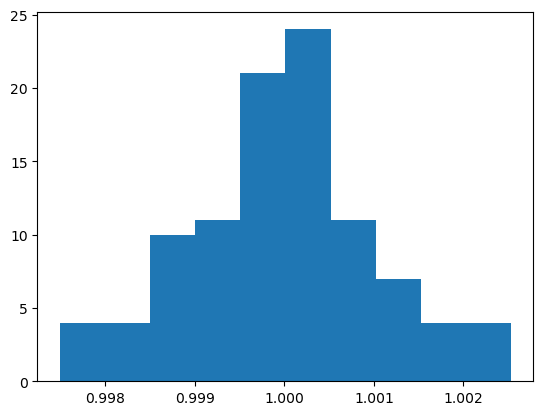

In [152]:
# Histograma
plt.hist(elementos)

In [153]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy            : 1.21.5
torch            : 1.13.0
matplotlib       : 3.5.2
pandas           : 1.4.4
pytorch_lightning: 1.8.3



# Fim